<a href="https://colab.research.google.com/github/Filimize/Course_1/blob/main/FilmIntern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tensorboard

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
#!kill 245

In [ ]:
%tensorboard --logdir logs

Launching TensorBoard...

KeyboardInterrupt: ignored

#F PART

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#1 Dominant mode single beam (dominant -/+ 2) -/+ 0.8
!gdown 1GMtUtygDg3BiUeBpKo9vHaFc0AUY5rXg

Downloading...
From: https://drive.google.com/uc?id=1GMtUtygDg3BiUeBpKo9vHaFc0AUY5rXg
To: /content/A_single_beam_weak_noise.h5
100% 5.91G/5.91G [04:07<00:00, 23.9MB/s]


In [ ]:
#1 beam with noise
!gdown 1-2AA_5JXaP55EL19TBzbBIJz6BdsVK_B

Downloading...
From: https://drive.google.com/uc?id=1-2AA_5JXaP55EL19TBzbBIJz6BdsVK_B
To: /content/1_beam.h5
100% 4.58G/4.58G [01:24<00:00, 54.4MB/s]


In [ ]:
#3 beam
!gdown 10fQA_RX0YFLKO3mGQAxxmFDrVeDCRYt_

Downloading...
From: https://drive.google.com/uc?id=10fQA_RX0YFLKO3mGQAxxmFDrVeDCRYt_
To: /content/3_beam_mode_nor.h5
100% 4.58G/4.58G [02:48<00:00, 27.1MB/s]


##MIX BEST MODEL

##H5

In [ ]:
import os
import h5py
import tensorflow as tf

def get_data_h5(name, batch_size, n=None, remove=True):
    with h5py.File(name, "r") as file:
        labels = [file[f'labels_{i}'] for i in range(3)]
        datasets = [file[f'dataset_{i}'] for i in range(3)]
        tf_datasets = []
        if n is not None:
            labels = [labels[i][:ni] for i, ni in enumerate(n)]
            datasets = [datasets[i][:ni] for i, ni in enumerate(n)]
        for label, dataset in zip(labels, datasets):
            label = tf.data.Dataset.from_tensor_slices(label)
            dataset = tf.data.Dataset.from_tensor_slices(tf.expand_dims(dataset, -1))
            tf_dataset = tf.data.Dataset.zip((dataset, label)).batch(batch_size)
            tf_datasets.append(tf_dataset)
    if remove:
        os.remove(name)
    return tf_datasets

##MODEL

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
def build_cnn_model(input_shape, num_modes):

    # Convolutional layers
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(128, (3, 3), activation='silu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(128, (3, 3), activation='silu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='silu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='silu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='silu', padding='same'))
    model.add(layers.Conv2D(32, (3, 3), activation='silu', padding='same'))
    model.add(layers.Conv2D(16, (3, 3), activation='silu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    # Fully connected layers
    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(2048, activation='silu'))
    model.add(layers.Dense(256, activation='silu'))
    model.add(layers.Dense(num_modes, activation='linear'))

    return model

# Specify input shape and number of output nodes (modes)
input_shape = (96, 96, 1)  # Input image size: 96x96 with 1 channel (grayscale)
num_modes = 12

# Build the CNN model
cnn_model = build_cnn_model(input_shape, num_modes)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # You can choose other optimizers as well
loss = 'mean_squared_error'  # Since it's a regression problem, we use Mean Squared Error (MSE)
cnn_model.compile(optimizer=optimizer, loss=loss)


# Display the model summary
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                    

In [ ]:
# Train the model
cnn_model.fit(dataset[0], validation_data = dataset[1], epochs=10)

NameError: ignored

In [ ]:
def model_1(input_shape, num_modes):

    # Convolutional layers
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(128, (3, 3), activation='silu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(128, (3, 3), activation='silu', padding='same',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='silu', padding='same',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
    model.add(layers.Conv2D(256, (3, 3), activation='silu', padding='same',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='silu', padding='same',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
    model.add(layers.Conv2D(128, (3, 3), activation='silu', padding='same',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
    model.add(layers.Conv2D(64, (3, 3), activation='silu', padding='same',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    # Fully connected layers
    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(2048, activation='silu',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
    model.add(layers.Dense(2048, activation='silu',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
    model.add(layers.Dense(num_modes, activation='linear'))

    return model

# Build the CNN model
model_1 = model_1(input_shape, num_modes)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # You can choose other optimizers as well
loss = 'mean_squared_error'  # Since it's a regression problem, we use Mean Squared Error (MSE)
model_1.compile(optimizer=optimizer, loss=loss)


# Display the model summary
model_1.summary()

In [ ]:
model_1.fit(dataset[0], validation_data = dataset[1], epochs=10)

In [ ]:
def model_2(input_shape, num_modes):

    # Convolutional layers
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_modes, activation='linear'))

    return model

# Build the CNN model
model_2 = model_2(input_shape, num_modes)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # You can choose other optimizers as well
loss = 'mean_squared_error'  # Since it's a regression problem, we use Mean Squared Error (MSE)
model_2.compile(optimizer=optimizer, loss=loss)


# Display the model summary
model_2.summary()

In [ ]:
model_2.fit(dataset[0], validation_data = dataset[1], epochs=10)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the LSTM-based model
def create_lstm_model(input_shape, num_zernike_coeffs):
    model = models.Sequential()

    # LSTM layers
    model.add(layers.LSTM(64, return_sequences=True, input_shape=input_shape))
    model.add(layers.LSTM(64, return_sequences=True))

    # Flatten LSTM output and add dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_zernike_coeffs))  # Output layer with num_zernike_coeffs neurons for the Zernike coefficients

    return model

# Define input shape (modify this according to your image size and sequence length)
input_shape = (3, , image_width, num_channels)

# Define the number of Zernike coefficients (12 modes)
num_zernike_coeffs = 12

# Create the LSTM-based model
model = create_lstm_model(input_shape, num_zernike_coeffs)

# Compile the model with an appropriate optimizer and loss function for regression task
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()


##Resnet

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_resnet_model(input_shape, num_modes, num_filters=64, num_blocks=5):
    inputs = layers.Input(shape=input_shape)

    # Initial Convolutional Block
    x = layers.Conv2D(num_filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Residual Blocks
    for _ in range(num_blocks):
        x = residual_block(x, num_filters)

    # Global Average Pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Fully connected layers
    x = layers.Dense(256, activation='silu')(x)
    x = layers.Dense(128, activation='silu')(x)

    # Output Layer
    output_layer = layers.Dense(num_modes, activation='linear')(x)

    model = models.Model(inputs=inputs, outputs=output_layer)

    return model

def residual_block(input_tensor, num_filters):
    x = layers.Conv2D(num_filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(num_filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Shortcut Connection
    shortcut = layers.Conv2D(num_filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(input_tensor)
    shortcut = layers.BatchNormalization()(shortcut)

    x = layers.add([x, shortcut])
    x = layers.ReLU()(x)

    return x

# Define input shape (modify this according to your image size and number of channels)
input_shape = (96, 96, 1)

# Define the number of Zernike coefficients (12 modes)
num_modes = 12

# Create the ResNet-based model
model_3 = create_resnet_model(input_shape, num_modes)

# Compile the model with an appropriate optimizer and loss function for regression task
model_3.compile(optimizer='Nadam', loss='mean_squared_error',metrics=['mse'])

# Print the model summary
model_3.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 96, 96, 64)   640         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 96, 96, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 re_lu (ReLU)                   (None, 96, 96, 64)   0           ['batch_normalization[0][0]']

In [ ]:
model_3.fit(dataset[0], validation_data = dataset[1], epochs=1)

NameError: ignored

In [ ]:
test_loss, test_accuracy = model_3.evaluate(dataset[0])

In [ ]:
test_accuracy

##Resnet2

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Add, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.initializers import HeNormal, GlorotNormal
def loss(mode=0):
    @tf.function(input_signature=(
            tf.TensorSpec(shape=[None, None], dtype=tf.float32), tf.TensorSpec(shape=[None, None], dtype=tf.float32)))
    def loss(y_labels, y_predicted):
        symmetric_labels = tf.concat([y_labels[:, 2:5], y_labels[:, 9:14]], 1)
        symmetric_pred = tf.concat([y_predicted[:, 2:5], y_predicted[:, 9:14]], 1)
        diffs_sym_1 = tf.reduce_sum(tf.abs(symmetric_labels - symmetric_pred), 1)
        diffs_sym_2 = tf.reduce_sum(tf.abs(symmetric_labels + symmetric_pred), 1)
        diffs_sym = tf.minimum(diffs_sym_1, diffs_sym_2)
        diffs_asym = tf.reduce_sum(
            tf.abs(tf.concat([y_labels[:, :2], y_labels[:, 5:9], y_labels[:, 14:20]], 1) - tf.concat(
                [y_predicted[:, :2], y_predicted[:, 5:9], y_predicted[:, 14:20]], 1)), 1)

        return tf.reduce_mean(diffs_sym + diffs_asym)

    @tf.function(input_signature=(
            tf.TensorSpec(shape=[None, None], dtype=tf.float32), tf.TensorSpec(shape=[None, None], dtype=tf.float32)))
    def loss_mae(y_labels, y_predicted):
        return tf.reduce_mean(tf.reduce_sum(tf.abs(y_labels - y_predicted), 1))

    return [loss_mae, loss][mode]

def resblock(x, filters, kernel_size, repetitions, pool=False):
    initializer = HeNormal()
    for _ in range(repetitions):
        shortcut = x
        x = Conv2D(filters, kernel_size,kernel_initializer=initializer, padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2D(filters, kernel_size,kernel_initializer=initializer, padding='same')(x)
        x = BatchNormalization()(x)
        x = Add()([x, shortcut])
        x = Activation('relu')(x)
    if pool:
        x = MaxPooling2D(2, 2)(x)
    return x

input_size = (96, 96, 1)  # Adjust the input size according to your data
num_modes = 12
def build_model(input_size,num_modes):
    inp = Input(input_size)
    initializer = HeNormal()
    initializer_2 = GlorotNormal()
    x = Conv2D(64, (7, 7), activation='relu',kernel_initializer=initializer, padding='same')(inp)
    x = MaxPooling2D(2, 2)(x)
    x = resblock(x, 64, (3, 3), 5, pool=True)
    x = resblock(x, 64, (3, 3), 5, pool=True)
    x = resblock(x, 64, (3, 3), 5, pool=True)
    x = resblock(x, 64, (3, 3), 4)
    x = resblock(x, 64, (3, 3), 4)
    x = resblock(x, 64, (1, 1), 1)
    x = Flatten()(x)
    x = Dense(4096,kernel_initializer=initializer_2, activation='silu')(x)
    x = Dense(4096,kernel_initializer=initializer_2, activation='silu')(x)
    x = Dense(2048,kernel_initializer=initializer_2, activation='silu')(x)
    x = Dense(1024,kernel_initializer=initializer_2, activation='silu')(x)
    x = Dense(512,kernel_initializer=initializer_2, activation='silu')(x)
    x = Dense(256,kernel_initializer=initializer_2, activation='silu')(x)
    x = Dense(128,kernel_initializer=initializer_2, activation='silu')(x)
    x = Dense(128,kernel_initializer=initializer_2, activation='silu')(x)
    x = Dense(num_modes,kernel_initializer=initializer_2, activation='linear')(x)  # Output layer with 10 nodes for regression

    model = Model(inp, x)
    return model

model_4 = build_model(input_size,num_modes)
model_4.compile(optimizer='Nadam', loss=loss(mode=0),metrics=['mse'])
model_4.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 96, 96, 64)           3200      ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 48, 48, 64)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 48, 48, 64)           36928     ['max_pooling2d[0][0]']   

##Resnet(Adam/Relu)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Add, Activation, BatchNormalization
from tensorflow.keras.models import Model

def resblock(x, filters, kernel_size, repetitions, pool=False):
    for _ in range(repetitions):
        shortcut = x
        x = Conv2D(filters, kernel_size, padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2D(filters, kernel_size, padding='same')(x)
        x = BatchNormalization()(x)
        x = Add()([x, shortcut])
        x = Activation('relu')(x)
    if pool:
        x = MaxPooling2D(2, 2)(x)
    return x

input_size = (96, 96, 1)  # Adjust the input size according to your data
num_modes = 12
def build_model(input_size,num_modes):
    inp = Input(input_size)
    x = Conv2D(64, (7, 7), activation='relu', padding='same')(inp)
    x = MaxPooling2D(2, 2)(x)
    x = resblock(x, 64, (3, 3), 5, pool=True)
    x = resblock(x, 64, (3, 3), 5, pool=True)
    x = resblock(x, 64, (3, 3), 5, pool=True)
    x = resblock(x, 64, (3, 3), 4)
    x = resblock(x, 64, (3, 3), 4)
    x = resblock(x, 64, (1, 1), 1)
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(2048, activation='relu')(x)
    x = Dense(1024, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(num_modes, activation='linear')(x)  # Output layer with 10 nodes for regression

    model = Model(inp, x)
    return model

model_5 = build_model(input_size,num_modes)
model_5.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])
model_5.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 96, 96, 64)   3200        ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 48, 48, 64)   0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 48, 48, 64)   36928       ['max_pooling2d[0][0]']          
                                                                                              

##SHUFFLENET

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.regularizers import l2
import numpy as np

def channel_shuffle(x, groups):
    _, w, h, c = x.shape
    group_ch = c // groups

    x = tf.reshape(x, (-1, w, h, groups, group_ch))
    x = tf.transpose(x, (0, 1, 2, 4, 3))  # Reshaping and shuffling
    x = tf.reshape(x, (-1, w, h, c))

    return x

def shuffle_unit(inputs, out_channels, groups=2):
    initializer = HeNormal()
    bottleneck_channels = out_channels // 4
    x = Conv2D(bottleneck_channels, (1, 1),kernel_initializer=initializer, activation='relu')(inputs)
    x = BatchNormalization()(x)

    x = channel_shuffle(x, groups)

    # Calculate the number of filters based on the value of bottleneck_channels
    num_filters = out_channels - inputs.shape[-1]

    # Ensure that the number of filters is at least 1
    num_filters = max(num_filters, 1)

    x = Conv2D(num_filters, (1, 1),kernel_initializer=initializer, activation='relu')(x)
    x = BatchNormalization()(x)

    return Concatenate()([inputs, x])



def build_shufflenet(input_size, num_modes):
    initializer = HeNormal()
    initializer_2 = GlorotNormal()
    inp = Input(input_size)

    x = Conv2D(24, (3, 3), activation='relu',kernel_initializer=initializer, padding='same')(inp)
    x = MaxPooling2D(2, strides=2)(x)

    x = shuffle_unit(x, out_channels=240)
    x = MaxPooling2D(2, strides=2)(x)

    x = shuffle_unit(x, out_channels=480)
    x = MaxPooling2D(2, strides=2)(x)

    x = shuffle_unit(x, out_channels=480)
    x = MaxPooling2D(2, strides=2)(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(4096,kernel_initializer=initializer_2, kernel_regularizer=l2(0.01), activation='silu')(x)
    x = Dense(4096,kernel_initializer=initializer_2, kernel_regularizer=l2(0.01),activation='silu')(x)
    x = Dense(2048,kernel_initializer=initializer_2, kernel_regularizer=l2(0.01),activation='silu')(x)
    x = Dense(1024,kernel_initializer=initializer_2, kernel_regularizer=l2(0.01),activation='silu')(x)
    x = Dense(512,kernel_initializer=initializer_2, kernel_regularizer=l2(0.01),activation='silu')(x)
    x = Dense(256,kernel_initializer=initializer_2, kernel_regularizer=l2(0.01),activation='silu')(x)
    x = Dense(128,kernel_initializer=initializer_2, kernel_regularizer=l2(0.01),activation='silu')(x)
    x = Dense(128,kernel_initializer=initializer_2, kernel_regularizer=l2(0.01),activation='silu')(x)
    x = Dense(num_modes,kernel_initializer=initializer_2, activation='linear')(x)  # Output layer with num_modes nodes for regression

    model = Model(inp, x)
    return model

input_size = (96, 96, 1)  # Adjust the input size according to your data
num_modes = 12

model_shufflenet = build_shufflenet(input_size, num_modes)
model_shufflenet.compile(optimizer='Nadam', loss=loss(mode=0), metrics=['mse'])
model_shufflenet.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 96, 96, 1)]  0           []                               
                                                                                                  
 conv2d_49 (Conv2D)             (None, 96, 96, 24)   240         ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 48, 48, 24)  0           ['conv2d_49[0][0]']              
                                                                                                  
 conv2d_50 (Conv2D)             (None, 48, 48, 60)   1500        ['max_pooling2d_4[0][0]']        
                                                                                            

##Xception

In [ ]:
from tensorflow.keras.layers import Input, SeparableConv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, Dense, Activation
from tensorflow.keras.models import Model

def build_xception(input_size, num_modes):
    initializer = HeNormal()
    initializer_2 = GlorotNormal()
    inp = Input(input_size)

    x = SeparableConv2D(32, (3, 3), activation='relu',kernel_initializer=initializer, padding='same')(inp)
    x = BatchNormalization()(x)
    x = SeparableConv2D(64, (3, 3), activation='relu',kernel_initializer=initializer, padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(3, strides=2, padding='same')(x)

    x = SeparableConv2D(128, (3, 3), activation='relu',kernel_initializer=initializer, padding='same')(x)
    x = BatchNormalization()(x)
    x = SeparableConv2D(256, (3, 3), activation='relu',kernel_initializer=initializer, padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(3, strides=2, padding='same')(x)

    x = SeparableConv2D(256, (3, 3), activation='relu',kernel_initializer=initializer, padding='same')(x)
    x = BatchNormalization()(x)
    x = SeparableConv2D(512, (3, 3), activation='relu',kernel_initializer=initializer, padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(3, strides=2, padding='same')(x)

    # Continue with more SeparableConv2D layers and skip connections

    x = GlobalAveragePooling2D()(x)
    x = Dense(4096, activation='silu',kernel_regularizer=l2(0.01),kernel_initializer=initializer_2)(x)
    x = Dense(4096, activation='silu',kernel_regularizer=l2(0.01),kernel_initializer=initializer_2)(x)
    x = Dense(2048, activation='silu',kernel_regularizer=l2(0.01),kernel_initializer=initializer_2)(x)
    x = Dense(1024, activation='silu',kernel_initializer=initializer_2)(x)
    x = Dense(512, activation='silu',kernel_initializer=initializer_2)(x)
    x = Dense(256, activation='silu',kernel_initializer=initializer_2)(x)
    x = Dense(128, activation='silu',kernel_initializer=initializer_2)(x)
    x = Dense(128, activation='silu',kernel_initializer=initializer_2)(x)
    x = Dense(num_modes, activation='linear',kernel_initializer=initializer_2)(x)

    model = Model(inp, x)
    return model

input_size = (96, 96, 1)  # Adjust the input size according to your data
num_modes = 12

model_xception = build_xception(input_size, num_modes)
model_xception.compile(optimizer='Nadam', loss=loss(mode=0), metrics=['mse'])
model_xception.summary()



Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 96, 1)]       0         
                                                                 
 separable_conv2d (Separable  (None, 96, 96, 32)       73        
 Conv2D)                                                         
                                                                 
 batch_normalization_54 (Bat  (None, 96, 96, 32)       128       
 chNormalization)                                                
                                                                 
 separable_conv2d_1 (Separab  (None, 96, 96, 64)       2400      
 leConv2D)                                                       
                                                                 
 batch_normalization_55 (Bat  (None, 96, 96, 64)       256       
 chNormalization)                                          

##MODEL GROUND

In [ ]:
!gdown 1RuhkDpMgMFyMWlIaWNntt1pXqrrMn-7g

Downloading...
From: https://drive.google.com/uc?id=1RuhkDpMgMFyMWlIaWNntt1pXqrrMn-7g
To: /content/mix_dom_no_dom.h5
100% 5.91G/5.91G [00:39<00:00, 150MB/s]


In [ ]:
dataset= get_data_h5("/content/A_single_beam_weak_noise.h5",batch_size= 64)

In [ ]:
stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")
history_shufflenet = model_4.fit(dataset[0], validation_data=dataset[1], epochs=10, shuffle=False, callbacks=[stop,reduce_lr,tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 377s 201ms/step - loss: 0.4293 - mse: 0.0024 - val_loss: 6.1861 - val_mse: 0.4469 - lr: 1.0000e-04
Epoch 2/10
1875/1875 [==============================] - 376s 201ms/step - loss: 0.4083 - mse: 0.0022 - val_loss: 4.9855 - val_mse: 0.2819 - lr: 1.0000e-04
Epoch 3/10
1875/1875 [==============================] - 375s 200ms/step - loss: 0.3901 - mse: 0.0020 - val_loss: 4.8630 - val_mse: 0.3178 - lr: 1.0000e-04
Epoch 4/10
1875/1875 [==============================] - 375s 200ms/step - loss: 0.3736 - mse: 0.0019 - val_loss: 3.9762 - val_mse: 0.1872 - lr: 1.0000e-04
Epoch 5/10
1875/1875 [==============================] - 376s 200ms/step - loss: 0.3587 - mse: 0.0017 - val_loss: 4.2870 - val_mse: 0.2176 - lr: 1.0000e-04
Epoch 6/10
1875/1875 [==============================] - 375s 200ms/step - loss: 0.3454 - mse: 0.0016 - val_loss: 6.0103 - val_mse: 0.4214 - lr: 1.0000e-04
Epoch 7/10
1875/1875 [==============================] - 375s 200ms/ste

In [ ]:
import shutil
model_4.save("1_noise_model.h5")
shutil.copy("1_noise_model.h5", "/content/drive/MyDrive/OpticsML/")


'/content/drive/MyDrive/OpticsML/1_noise_model.h5'

In [ ]:
history_shufflenet.history['val_loss']

[6.304370880126953,
 7.359570503234863,
 8.872404098510742,
 9.326915740966797,
 8.493438720703125,
 10.002659797668457,
 6.194578647613525,
 5.122730255126953,
 3.113776445388794,
 4.046057224273682]

In [ ]:
history_shufflenet.history['val_mse']

[0.4270794987678528,
 0.579643726348877,
 1.15090012550354,
 1.072864294052124,
 0.8060885071754456,
 1.201610803604126,
 0.44943535327911377,
 0.3585020899772644,
 0.1280478686094284,
 0.19603563845157623]

In [ ]:
# Register the custom loss function when loading the model
# Define the Huber loss function
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    quadratic_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(tf.abs(error) <= delta, quadratic_loss, linear_loss)

with tf.keras.utils.custom_object_scope({'loss_mae': loss(mode=0)}):
    model_4 = tf.keras.models.load_model('/content/drive/MyDrive/OpticsML/single_beam_res2_improved.h5')
    # model_4.compile(optimizer='Nadam', loss=huber_loss,metrics=loss(mode=0))  # Compile the model with the custom loss


In [ ]:
import shutil
import tensorflow as tf
ma = []
ms = []
stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")
less = False

while not less:
    history = model_4.fit(dataset[0], validation_data=dataset[1], epochs=10, shuffle=False, callbacks=[stop, reduce_lr,tensorboard_callback])
    if min(history.history['val_loss']) > 0.08:
        ma.append(history.history['val_loss'])
        ms.append(history.history['val_mse'])
        print("mae:",history.history['val_loss'],'/n',"mse:",history.history['val_mse'])
        model_4.save("single_beam_res2_improved.h5")
        shutil.copy("single_beam_res2_improved.h5", "/content/drive/MyDrive/OpticsML/")
    else:
        model_4.save("single_beam_res2_improved.h5")
        shutil.copy("single_beam_res2_improved.h5", "/content/drive/MyDrive/OpticsML/")
        ma.append(history.history['val_loss'])
        ms.append(history.history['val_mse'])
        print("mae:",history.history['val_loss'],'/n',"mse:",history.history['val_mse'])
        less = True

In [ ]:
[print(i) for i in ma]

[1.7930656671524048, 1.1803542375564575, 1.1821225881576538, 1.5787155628204346, 0.6319171190261841, 1.962738275527954, 0.6964985132217407, 2.0019049644470215, 1.7550748586654663, 0.5769467353820801]


[None]

In [ ]:
ms

[[0.03714953735470772,
  0.016429955139756203,
  0.01647276245057583,
  0.028713924810290337,
  0.0050377496518194675,
  0.0446791835129261,
  0.005922794342041016,
  0.045930806547403336,
  0.035415828227996826,
  0.00411661621183157]]

In [ ]:
import shutil
import tensorflow as tf

stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)
less = False

while not less:
    history = model_shufflenet.fit(dataset[0], validation_data=dataset[1], epochs=10, shuffle=False, callbacks=[stop, reduce_lr])
    if min(history.history['val_loss']) > 0.1:
        model_shufflenet.save("single_beam_shufflenet_2.h5")
        shutil.copy("single_beam_shufflenet_2.h5", "/content/drive/MyDrive/OpticsML/")
    else:
        model_shufflenet.save("single_beam_shufflenet_2.h5")
        shutil.copy("single_beam_shufflenet_2.h5", "/content/drive/MyDrive/OpticsML/")
        less = True

In [ ]:
stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)
less = False

while not less:
    history = model_xception.fit(dataset[0], validation_data=dataset[1], epochs=10, shuffle=False, callbacks=[stop, reduce_lr])
    if min(history.history['val_loss']) > 0.1:
        model_xception.save("single_beam_xception_2.h5")
        shutil.copy("single_beam_xception_2.h5", "/content/drive/MyDrive/OpticsML/")
    else:
        model_xception.save("single_beam_xception_2.h5")
        shutil.copy("single_beam_xception_2.h5", "/content/drive/MyDrive/OpticsML/")
        less = True

<ipython-input-16-6d204ceeb938>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', label='Validation MAE', color = 'red')


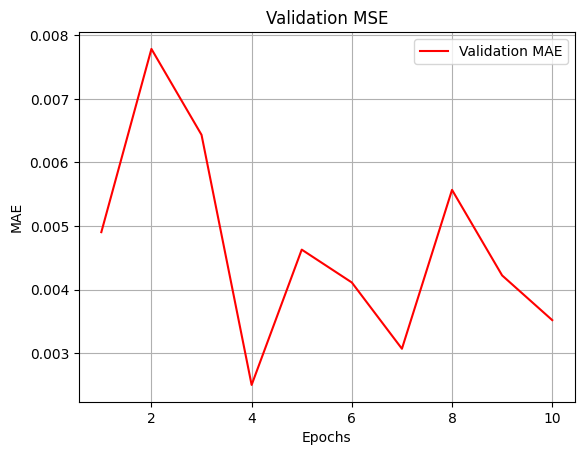

In [ ]:
import matplotlib.pyplot as plt

# Extract the validation accuracy from the training history
val_acc = history.history['val_mse']
train_acc =history.history['loss']

epochs = range(1, len(val_acc) + 1)

# Plotting the validation accuracy
plt.plot(epochs, val_acc, 'b', label='Validation MAE', color = 'red')
#plt.plot(epochs, train_acc, 'b', label='Training MAE')
plt.title('Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

# Save the plot as an image file (e.g., PNG format)
plt.savefig('validation_mae_plot_single_beam_no_dom_res2.png')

# Display the plot
plt.show()


##SAVE MODEL

In [ ]:
model_4.save("single_beam_no_dom_res2.h5")

##EXCEL

In [ ]:
training_mse = model_shufflenet.evaluate(dataset[0])
print("Training MSE from Keras:", training_mse)

1875/1875 [==============================] - 37s 20ms/step - loss: 14863203.0000 - mse: 14863205.0000
Training MSE from Keras: [14863203.0, 14863205.0]


In [ ]:
dataset= get_data_h5("/content/drive/MyDrive/OpticsML/test_2.h5",batch_size= 64)

In [ ]:
import tensorflow as tf
loss_mae = loss(mode=0)
model_4 = tf.keras.models.load_model('/content/drive/MyDrive/OpticsML/single_beam_res2_improved.h5', custom_objects={'loss_mae': loss_mae})

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as  np
import pandas as pd


test_dataset = dataset[2]

# Collect predictions and labels using the trained model
test_predictions = []
test_labels = []

for batch in test_dataset:
    batch_predictions = model_4.predict(batch[0])
    batch_true_labels = batch[1]

    test_predictions.append(batch_predictions)
    test_labels.append(batch_true_labels)

test_predictions = np.concatenate(test_predictions, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

# Create separate columns for each mode's prediction and true label
prediction_columns = [f'Predicted Mode {i+1}' for i in range(num_modes)]
label_columns = [f'True Label Mode {i+1}' for i in range(num_modes)]

# Create a DataFrame with the collected predictions and labels
prediction_df = pd.DataFrame(data=np.hstack((test_predictions, test_labels)),
                              columns=prediction_columns + label_columns)

# Calculate the differences for each mode
differences = np.absolute(test_predictions - test_labels)

# Calculate the MSEs for each mode
mses = [mean_squared_error(test_labels[:, i], test_predictions[:, i]) for i in range(num_modes)]

# Create separate DataFrames for differences and MSEs
difference_df = pd.DataFrame(data=differences, columns=[f'Difference Mode {i+1}' for i in range(num_modes)])
mse_df = pd.DataFrame(data=[mses], columns=[f'MSE Mode {i+1}' for i in range(num_modes)])

# Concatenate the DataFrames with differences and MSEs
result_df = pd.concat([prediction_df, difference_df, mse_df], axis=1)

# Reorganize the columns as desired
column_order = []
for i in range(num_modes):
    column_order.append(f'Predicted Mode {i+1}')
    column_order.append(f'True Label Mode {i+1}')
    column_order.append(f'Difference Mode {i+1}')
    column_order.append(f'MSE Mode {i+1}')

result_df = result_df[column_order]

1/1 [==============================] - 0s 27ms/step


In [ ]:
mse_df

,MSE Mode 1,MSE Mode 2,MSE Mode 3,MSE Mode 4,MSE Mode 5,MSE Mode 6,MSE Mode 7,MSE Mode 8,MSE Mode 9,MSE Mode 10,MSE Mode 11,MSE Mode 12
0,0.00906,0.005741,0.005954,0.006051,0.006192,0.002858,0.002559,0.002589,0.003256,0.001969,0.001773,0.001393


##execution


In [ ]:
import time
import numpy as np
import tensorflow as tf  # or import the relevant library for your CNN implementation

test_dataset = dataset[2]
exe = []
for batch in test_dataset:
    for input_data in batch[0]:
        start_time = time.time()
        batch_prediction = model_4.predict(np.expand_dims(input_data, axis=0))
        end_time = time.time()
        execution_time = end_time - start_time
        exe.append(execution_time)

In [ ]:
result_df

,Predicted Mode 1,True Label Mode 1,Difference Mode 1,MSE Mode 1,Predicted Mode 2,True Label Mode 2,Difference Mode 2,MSE Mode 2,Predicted Mode 3,True Label Mode 3,...,Difference Mode 10,MSE Mode 10,Predicted Mode 11,True Label Mode 11,Difference Mode 11,MSE Mode 11,Predicted Mode 12,True Label Mode 12,Difference Mode 12,MSE Mode 12
0,-1.245517,-1.265618,0.020101,0.009264,-0.184003,-0.167026,0.016977,0.005845,-0.327631,-0.264113,...,0.032436,0.00199,0.257885,0.216397,0.041488,0.001797,-0.223887,-0.217620,0.006267,0.001428
1,-1.685060,-1.595906,0.089155,NaN,0.823530,0.801273,0.022257,NaN,-0.593786,-0.663107,...,0.048165,NaN,-0.704151,-0.682731,0.021420,NaN,0.526713,0.570112,0.043399,NaN
2,1.538995,1.506846,0.032149,NaN,0.847540,0.841907,0.005633,NaN,-0.347471,-0.381993,...,0.009949,NaN,-0.414220,-0.420272,0.006052,NaN,0.272489,0.291103,0.018614,NaN
3,-1.626450,-1.633206,0.006756,NaN,-0.074680,-0.004836,0.069844,NaN,0.191641,0.336310,...,0.034991,NaN,0.467404,0.549746,0.082343,NaN,0.509081,0.528174,0.019093,NaN
4,-0.489387,-0.570171,0.080784,NaN,-1.830074,-1.907276,0.077203,NaN,-0.219135,-0.208192,...,0.003341,NaN,0.473566,0.506134,0.032569,NaN,-0.473552,-0.483645,0.010093,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.805190,1.790131,0.015059,NaN,1.833509,1.838452,0.004943,NaN,-0.312131,-0.382644,...,0.027450,NaN,-0.234363,-0.216215,0.018149,NaN,0.736883,0.714273,0.022610,NaN
19996,-0.157307,-0.043542,0.113765,NaN,-0.667676,-0.776842,0.109166,NaN,0.760952,0.747815,...,0.090410,NaN,0.126612,0.119425,0.007187,NaN,-0.091767,-0.033711,0.058056,NaN
19997,-0.820602,-0.990896,0.170295,NaN,0.174518,0.125512,0.049006,NaN,-0.616851,-0.529450,...,0.008704,NaN,0.568340,0.635539,0.067199,NaN,-0.642919,-0.646199,0.003280,NaN
19998,-1.082060,-1.092400,0.010339,NaN,0.000846,-0.060052,0.060898,NaN,0.285715,0.312177,...,0.006005,NaN,0.496998,0.567714,0.070716,NaN,-0.362292,-0.353141,0.009151,NaN


In [ ]:
# Save the DataFrame as a CSV file
result_df.to_csv('mse_single_dom_res_improved.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## EXPORT TO DRIVE

In [ ]:
import shutil
!cp /content/single_beam_no_dom_res2.h5 /content/drive/MyDrive/OpticsML/no_dom0068/

In [ ]:
!cp /content/validation_mae_plot_single_beam_no_dom_res2.png /content/drive/MyDrive/OpticsML/no_dom0068

In [ ]:
!cp /content/mse_single_dom_res2.csv /content/drive/MyDrive/OpticsML

#CSV STAT

In [ ]:
!gdown 1YN5KFQqB55YMC0Xbcb33zF7v9JpLDiFX

Downloading...
From: https://drive.google.com/uc?id=1YN5KFQqB55YMC0Xbcb33zF7v9JpLDiFX
To: /content/mse_single_dom_res2.csv
100% 14.7M/14.7M [00:00<00:00, 58.9MB/s]


In [ ]:
dataset= get_data_h5("/content/A_single_beam_weak_noise.h5",batch_size= 64)

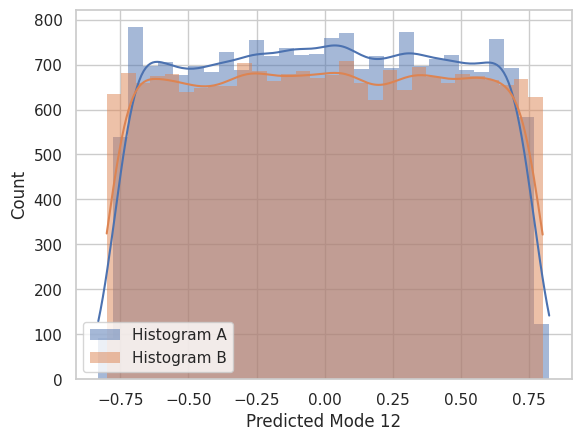

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import shutil

# Create histograms
sns.set(style="whitegrid")

for i in range(12):
  plt.clf()  # Clear the current figure
  sns.histplot(result_df[f'Predicted Mode {i+1}'],kde=True, bins=30, alpha=0.5, label="Histogram A", edgecolor='none')
  sns.histplot(result_df[f'True Label Mode {i+1}'],kde=True, bins=30, alpha=0.5, label="Histogram B", edgecolor='none')

  plt.legend()
  plt.savefig(f'plot_distribution_mode {i+1}.png')
  shutil.copy(f'plot_distribution_mode {i+1}.png', "/content/drive/MyDrive/OpticsML/plot_distribution/Hist")

In [ ]:
result_df

,Predicted Mode 1,True Label Mode 1,Difference Mode 1,MSE Mode 1,Predicted Mode 2,True Label Mode 2,Difference Mode 2,MSE Mode 2,Predicted Mode 3,True Label Mode 3,...,Difference Mode 10,MSE Mode 10,Predicted Mode 11,True Label Mode 11,Difference Mode 11,MSE Mode 11,Predicted Mode 12,True Label Mode 12,Difference Mode 12,MSE Mode 12
0,0.077487,0.0,0.077487,0.006685,-0.145000,0.0,0.145000,0.004949,-0.822664,-0.780949,...,0.067740,0.00171,-0.359903,-0.327512,0.032391,0.001412,0.275138,0.298697,0.023559,0.00118
1,-0.052059,0.0,0.052059,NaN,0.006199,0.0,0.006199,NaN,0.735874,0.700514,...,0.005773,NaN,0.267358,0.264489,0.002869,NaN,0.700605,0.759998,0.059393,NaN
2,0.106197,0.0,0.106197,NaN,-0.028096,0.0,0.028096,NaN,0.319022,0.438271,...,0.029632,NaN,-0.258040,-0.293809,0.035769,NaN,-0.131939,-0.214964,0.083025,NaN
3,-0.001362,0.0,0.001362,NaN,-0.044040,0.0,0.044040,NaN,0.624398,0.603604,...,0.030062,NaN,0.097737,0.099919,0.002182,NaN,-0.274861,-0.314222,0.039361,NaN
4,0.028669,0.0,0.028669,NaN,0.042500,0.0,0.042500,NaN,-0.175855,-0.229836,...,0.047550,NaN,-0.142550,-0.174116,0.031566,NaN,0.149009,0.151384,0.002375,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.031258,0.0,0.031258,NaN,0.002897,0.0,0.002897,NaN,0.632054,0.671073,...,0.022582,NaN,-0.261142,-0.306788,0.045646,NaN,0.056484,-0.009812,0.066296,NaN
19996,0.076802,0.0,0.076802,NaN,-0.035429,0.0,0.035429,NaN,0.490871,0.492970,...,0.048410,NaN,0.714113,0.736582,0.022469,NaN,-0.201369,-0.233451,0.032082,NaN
19997,-0.084120,0.0,0.084120,NaN,0.019632,0.0,0.019632,NaN,0.199506,0.130406,...,0.037183,NaN,0.275376,0.229560,0.045816,NaN,0.066988,0.020371,0.046617,NaN
19998,0.048740,0.0,0.048740,NaN,-0.019346,0.0,0.019346,NaN,-0.006630,-0.057927,...,0.018145,NaN,0.375515,0.392088,0.016573,NaN,-0.381526,-0.394820,0.013294,NaN


In [ ]:
from scipy.stats import mannwhitneyu
for i in range(12):

    data_a = result_df[f'Predicted Mode {i+1}']
    data_b = result_df[f'True Label Mode {i+1}']
    # Perform Mann-Whitney U test
    stat, p_value = mannwhitneyu(data_a, data_b)
    if p_value < 0.05:
        result = "different"
    else:
        result = "similar"
    print(p_value)

0.135712594671168
0.30622551691000366
0.005083540857382524
0.5943864713813083
0.00981218112244338
0.26252643405679665
0.4459066688003298
0.012303803509200918
0.27315499961938583
0.7389411756967643
0.6082598704031928
0.939796558159874


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
from scipy.stats import mannwhitneyu

# Create box plots and perform Mann-Whitney U test
sns.set(style="whitegrid")

for i in range(12):
    plt.clf()  # Clear the current figure

    data_a = result_df[f'Predicted Mode {i+1}']
    data_b = result_df[f'True Label Mode {i+1}']

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=[data_a, data_b], notch=True, palette="Set3")
    plt.title(f'Box Plot - Mode {i+1}')

    # Perform Mann-Whitney U test
    stat, p_value = mannwhitneyu(data_a, data_b)
    if p_value < 0.05:
        result = "different"
    else:
        result = "similar"

    plt.text(0.95, 0.85, f'p-value: {p_value:.4f}\nDistribution: {result}',
             transform=plt.gca().transAxes, ha='right', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    plt.savefig(f'box_plot_mode_{i+1}.png')
    plt.close()

    shutil.copy(f'box_plot_mode_{i+1}.png', "/content/drive/MyDrive/OpticsML/plot_distribution/Boxplot")

print("Box plots and results saved.")


Box plots and results saved.


<Figure size 640x480 with 0 Axes>

Text(0.95, 0.85, 'p-value: 0.9933\nDistribution: similar')

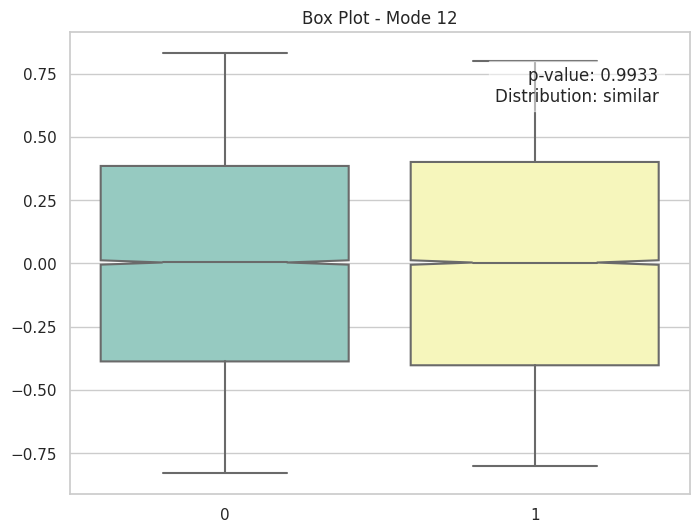

In [ ]:
from scipy.stats import mannwhitneyu

data_a = result_df[f'Predicted Mode {i+1}']
data_b = result_df[f'True Label Mode {i+1}']

plt.figure(figsize=(8, 6))
sns.boxplot(data=[data_a, data_b], notch=True, palette="Set3")
plt.title(f'Box Plot - Mode {i+1}')

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(data_a, data_b)
if p_value < 0.05:
    result = "different"
else:
    result = "similar"

plt.text(0.95, 0.85, f'p-value: {p_value:.4f}\nDistribution: {result}',
        transform=plt.gca().transAxes, ha='right', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))


##GEN

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Add, Activation, BatchNormalization, \
    AveragePooling2D, Concatenate
import tensorflow as tf
from tensorflow.keras import metrics, regularizers, Input
from tensorflow.keras.optimizers import Adam
import numpy as np
from colorsys import hls_to_rgb
import time
import os
import sys
import numpy as np
import h5py
from matplotlib import pyplot as plt
import matplotlib
#from .colorconv import color_circle, colorize
import functools
import shutil
import os, time, h5py
import numpy as np
import tensorflow as tf
#from .labels import gen_label
#from . import funcs, colorconv
import h5py, json, os, time, zipfile, glob, shutil
import pandas as pd
from tensorflow.keras.callbacks import Callback, TensorBoard
#from .labels import gen_label
#from .generator import generate_from_labels, Generator, configure, add_noise, infieldap
#from .training import get_data_h5, loss_new, loss, acc_pass
from PIL import Image, ImageOps
from numpy import asarray
from tensorflow.keras.models import Model
#from .funcs import plot_intensity_row, plot_intensity


In [ ]:
def gen_label(mode, n_bases, num, p=None):
    def all_zero():  # 0
        return np.zeros(( num, n_bases))

    def uniform_random_1():  # 1
        a_nm_vec = np.zeros((num, n_bases))
        a_nm_vec[:, 0:2] = np.random.uniform(-2, 2, (num, 2))
        for j in range(2, n_bases):
            a_nm_vec[:, j] = np.random.uniform(-0.8, 0.8, num)
        return a_nm_vec

    def uniform_random_2():  # 2
        # Without translation bases
        a_nm_vec = np.zeros((num, n_bases))
        for j in range(2, n_bases):
            a_nm_vec[:, j] = np.random.uniform(-0.8, 0.8, num)
        return a_nm_vec

    def one_base_dominant():  # 3
        a_nm_vec = np.zeros((num, n_bases))
        dom_base = np.random.randint(0, n_bases, num)
        dom_amp, amp = 2, 0.1
        for i in range(num):
            a_nm_vec[i, :n_bases] = np.random.uniform(-amp, amp, n_bases)
            a_nm_vec[i, dom_base[i]] = np.random.uniform(-dom_amp, dom_amp)
        return np.expand_dims(a_nm_vec, 0)

    def mixed9010():  # 4
        uf = uniform_random_1()[:, :(num * 9) // 10]
        bd = one_base_dominant()[:, :(num * 1) // 10]
        a_nm_vec = np.concatenate([uf, bd], 1)
        np.random.shuffle(a_nm_vec)
        return a_nm_vec

    def ladder():  # 5
        nrange = np.linspace(-2, 2, 101)
        asi = []
        for i in range(n_bases):
            a_i = np.zeros((len(nrange), n_bases))
            a_i[:, i] = nrange
            asi.append(a_i)
        a_nm_vec = np.stack(asi, 0)
        return a_nm_vec

    def uniform_random_1_add_noise(): # 6  #add noise by concat axis 1
        a_nm_vec = uniform_random_1()
        return np.concatenate([a_nm_vec, np.random.uniform(-p["noise_z"], p["noise_z"], (num, 10))], 1)

    def uniform_random_1_weak(): # 7
        a_nm_vec = np.random.uniform(-2,2,(num,2))
        a_nm_vec2 = np.random.uniform(-0.8, 0.8, (num, n_bases-12))
        a_nm_vec3 = np.random.uniform(-p["noise_z"], p["noise_z"], (num, 10))
        return np.concatenate([a_nm_vec, a_nm_vec2, a_nm_vec3], 1)

    def mix_1_2():
        a_nm_vec = np.zeros((num, n_bases))

        uniform_range = np.random.uniform(-0.8, 0.8, num)

        if n_bases % 2 == 0:
            a_nm_vec[:, 0:2] = np.random.uniform(-2, 2, (num, 2))
            a_nm_vec[:, 2:] = uniform_range[:, np.newaxis]
        else:
            a_nm_vec[:, 2:] = uniform_range[:, np.newaxis]

        return a_nm_vec

    f_list = [all_zero, uniform_random_1, uniform_random_2, one_base_dominant,
              mixed9010, ladder, uniform_random_1_add_noise, uniform_random_1_weak, mix_1_2]

    return f_list[mode]()

In [ ]:
gen_label = gen_label
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


class Zernike:
    def __init__(self, theta, rho):
        self.theta = theta
        self.rho = rho
        self.Z = dict()

    def Rln(self, n, l): # Radial Polynomial
        fac = np.math.factorial
        R_terms = [((-1) ** k * fac(n - k)) * self.rho ** (n - 2 * k)
                   / (fac(k) * fac((n + l) // 2 - k) * fac((n - l) // 2 - k)) for k in range((n - l) // 2 + 1)]
        R_terms = np.stack(R_terms, 0)
        return np.sum(R_terms, 0)

    def Z_j(self, j): # Mode j Zernike
        def nlf(j): # Ordering Zernike coefficients
            n = np.ceil((np.sqrt(1 + 8 * j)) / 2 - 1.5)
            k = j - (n + 1) * n // 2
            l = (-1) ** (k + (n + 1) // 2) * (n % 2 + ((k + (n + 1) % 2 - 1) // 2) * 2)
            return int(n), int(l)

        if not j in self.Z.keys():
            n, l = nlf(j)
            if l < 0:
                self.Z[j] = self.Rln(n, -l) * np.sin(l * self.theta) * (2 * n + 2) ** 0.5
            elif l > 0:
                self.Z[j] = self.Rln(n, l) * np.cos(l * self.theta) * (2 * n + 2) ** 0.5
            else:
                self.Z[j] = self.Rln(n, l) * (n + 1) ** 0.5

    def get_Z(self, coeffs):
        n_bases = coeffs.shape[1]
        for i in range(n_bases):
            self.Z_j(i + 1)
        zs = tf.stack([self.Z[i + 1] for i in range(n_bases)], 0)[tf.newaxis, :]
        return tf.reduce_sum(zs * coeffs[:, :, tf.newaxis, tf.newaxis], 1)

class Generator: # Simulation
    def __init__(self, dtype=tf.float32):
        self.limited = False # True if limited memory capacity else risking OOM
        self.initialized = False
        self.dtype = dtype
        self.wavelength = 532e-9  # laser wavelength[m]
        self.wave_k = None

        self.Dist = 1e3  # Distance to receiver[m](far - field for 2mm beam) DEFAULT 1000 m
        DiagHolo = 2e-3  # Diameter of aperture on SLM(beam / hologram diameter) [m]
        xb = 2e-2  # spacing in OUTPUT grid(dist=1e3, 2mm beam, r0 = 7cm)
        self.gridA = 40  # Size for checking far-field  needs to be an even number  grid will be 2 * gridA X 2 * gridA
        self.radius = 1  # radius of aperture to apply to hologram & input intensity
        self.TIP = 0  # Additional Z2 for spatial separation of 0th & 1st order diffraction
        self.TILT = 0  # Additional Z3 for spatial separation of 0th & 1st order diffraction
        self.noise = lambda x: 0

        self.C, self.D = [None, None]
        self.E, self.F = [None, None]

        self.field_func = infieldap(0)
        self.Aperture = None
        self.X, self.Y = None, None
        self.theta = None
        self.rho = None
        self.zernike = None
        self.inFieldAp = None
        self.cnst_tensor = None
        self.unperturbed = None

    def initialize(self):
        dtype = self.dtype
        # ** ** ** ** BEAM DIAMETER = 2mm ** ** ** ** *
        self.wave_k = 2 * np.pi / self.wavelength
        DiagHolo = 2e-3  # Diameter of aperture on SLM(beam / hologram diameter) [m]
        xb = 2e-2  # spacing in OUTPUT grid(dist=1e3, 2mm beam, r0 = 7cm)

        # ** ** ** ** ** ** Parameters ** ** ** ** ** **

        xa = DiagHolo / (2 * self.gridA)  # spacing between pixels in INPUT grid
        xrange = 1

        # INPUT grid
        aa = np.linspace(-xa * self.gridA, xa * self.gridA, 2 * self.gridA)  # length of input grid
        self.C, self.D = np.meshgrid(aa, aa)  # input grid
        l1 = len(self.C)

        # OUTPUT grid
        bb = np.linspace(-xb * self.gridA, xb * self.gridA, 2 * self.gridA)  # length of output grid
        self.E, self.F = np.meshgrid(bb, bb)  # output grid
        l2 = len(self.E)

        xx = np.arange(-xrange, xrange + ((2 * xrange) / (l1 - 1)),
                       ((2 * xrange) / (l1 - 1)))
        [X, Y] = np.meshgrid(xx, xx)
        [theta, rho] = np.arctan2(Y, X), np.sqrt(X ** 2 + Y ** 2)  # This makes theta[-pi, pi]
        x = len(rho)
        Aperture = np.zeros((x, x))
        for k in range(x):
            for j in range(x):
                if rho[k, j] <= self.radius:
                    Aperture[k, j] = 1

        self.X, self.Y = tf.cast(X, dtype), tf.cast(Y, dtype)
        self.Aperture = tf.cast(Aperture, dtype)
        self.theta = tf.cast(theta, dtype)
        self.rho = tf.cast(rho, dtype)
        self.zernike = Zernike(self.theta, self.rho)
        self.inFieldAp = tf.multiply(self.field_func(self.rho, self.theta), self.Aperture) ** 0.5

        self.Cnst_tensor()

        self.initialized = True

        self.unperturbed = self.generate_imgs(np.zeros((1, 2)))[0]

    def set_Infield(self, field_func):
        self.field_func = field_func
        if self.initialized:
            self.initialize()

    def Phasemask(self, coeffs):
        out = []
        n = 1000
        for i in range(coeffs.shape[0] // n + 1):
            coeff = coeffs[i * n: (i + 1) * n]
            PhM = self.zernike.get_Z(coeff) # Generate function from Zernike Polynomials
            PhM_turbAp = tf.cast(PhM * self.Aperture[tf.newaxis, :, :], tf.dtypes.complex128)
            ei_PhM = tf.exp(1.j * PhM_turbAp)
            ei_PhM = tf.cast(ei_PhM, tf.dtypes.complex64)
            out.append(ei_PhM)
        return tf.concat(out, 0)
        # return tf.cast(ei_PhM, tf.dtypes.complex64)

    def Cnst_tensor(self):

        inFieldAp = tf.cast(self.inFieldAp, tf.dtypes.complex128) # Input field through the aperture

        X = self.E[:, :, tf.newaxis, tf.newaxis] # Output space
        Y = self.F[:, :, tf.newaxis, tf.newaxis]
        x = self.C[tf.newaxis, tf.newaxis, :, :] # Input space
        y = self.D[tf.newaxis, tf.newaxis, :, :]

        diffr_tensor = self.Dist ** 2 + (X - x) ** 2 + (Y - y) ** 2
        ei_diffr_tensor = tf.exp(1.j * self.wave_k * diffr_tensor ** 0.5) # Path difference

        if self.limited:
            c1 = []
            for i1 in range(2 * self.gridA):
                c2 = []
                for i2 in range(2 * self.gridA):
                    c3 = inFieldAp * ei_diffr_tensor[i1, i2] / diffr_tensor[i1, i2]
                    c2.append(tf.cast(c3, tf.dtypes.complex64))
                c1.append(tf.stack(c2))
            self.cnst_tensor = tf.stack(c1)
        else:
            inFieldAp = inFieldAp[tf.newaxis, tf.newaxis, :, :]
            self.cnst_tensor = inFieldAp * ei_diffr_tensor / diffr_tensor
            self.cnst_tensor = tf.cast(self.cnst_tensor, tf.dtypes.complex64)

    def generate_imgs(self, coeffs):
        if not self.initialized:
            self.initialize()
        t = time.time()
        n_samples, n_bases = tf.shape(coeffs)
        coeffs = tf.concat([tf.zeros((n_samples, 1), dtype=self.dtype), coeffs], 1) # Adding Z0,0 mode

        phasemask = self.Phasemask(coeffs)[:, tf.newaxis, tf.newaxis, :, :] # Generate phase distribution
        phasemask = tf.cast(phasemask, tf.dtypes.complex64) # Cast to complex number

        outbeamturb = []
        for i in range(n_samples):
            outfieldturb = phasemask[i] * self.cnst_tensor # Diffraction Equation
            outfieldturb = tf.reduce_sum(outfieldturb, (2, 3)) # Integrate over aperture space
            outbeamturb_i = tf.abs(outfieldturb) ** 2 # Intensity
            outbeamturb_i += tf.cast(tf.abs(np.random.normal(0, self.noise(0), outbeamturb_i.shape)), outbeamturb_i.dtype) # White Noise
            outbeamturb.append(outbeamturb_i)

        outbeamturb = tf.stack(outbeamturb, 0) # Stacking output together
        outbeamturb_norm = outbeamturb / tf.reduce_sum(outbeamturb, (1, 2), keepdims=True) # Normalization

        print(f"Total time: {time.time() - t}")
        print(f"Average time per picture: {(time.time() - t) / n_samples.numpy()}")

        return outbeamturb_norm



def add_noise(imgs, strength=1e-5):
    noise = np.abs(np.random.normal(0, strength, imgs.shape))
    imgs += tf.convert_to_tensor(noise, dtype=imgs.dtype)
    return imgs / tf.reduce_sum(imgs, (1, 2), keepdims=True)


def configure(o):
    g = Generator()
    g.gridA = o["width"] // 2
    if "limited_memory" not in o:
        o["limited_memory"] = False
    if "infield" not in o:
        o["infield"] = [0]
    elif type(o["infield"]) == int:
        o["infield"] = [o["infield"]]
    if "noise_gauss" not in o:
        o["noise_gauss"] = 0
    if o["noise_gauss"] > 0:
        g.noise = lambda x: o["noise_gauss"]
    else:
        g.noise = lambda x: np.random.uniform(0,-o["noise_gauss"])
    g.limited = o['limited_memory']
    g.field_func = infieldap(*o["infield"])
    g.initialize()
    return g


def generate(generator, order, id):
    n_samples = [order["n_training"], order["n_validation"], order["n_test"]]
    labels = [gen_label(order["labels_mode"][i], order["n_bases"], n_samples[i], order) for i in range(3)]
    with h5py.File(f"logs/{id}.h5", "w") as file:
        for i, label in enumerate(labels):
            file.create_dataset(f"labels_{i}", data=label[:, :order['n_bases']])
            dataset = []
            for num in np.arange(0, len(label), 10000):
                dataset.append(generator.generate_imgs(label[num:num + 10000]).numpy())
            file.create_dataset(f"dataset_{i}", data=np.concatenate(dataset))


def generate_from_labels(generator, labels, n_bases, batch_size=64):
    datasets = []
    for i, label in enumerate(labels):
        dataset = []
        for num in np.arange(0, len(label), 10000):
            dataset.append(generator.generate_imgs(label[num:num + 10000]))
        dataset = tf.concat(dataset, 0)
        label = tf.data.Dataset.from_tensor_slices(label[:, :n_bases])
        dataset = tf.data.Dataset.from_tensor_slices(tf.expand_dims(dataset, -1))
        tf_dataset = tf.data.Dataset.zip((dataset, label)).batch(batch_size)
        datasets.append(tf_dataset)
    return datasets


def infieldap(mode, num=1, dr=0, waist=0.5):
    def f2(rho, theta):
        InField = tf.exp((-2 * (rho - dr * np.max(rho)) ** 2 / waist ** 2)) * np.cos(theta * num / 2) ** 2
        return InField

    def f(rho, theta):
        dth = np.array([np.pi * 2 * i / num for i in range(num)])
        dxs, dys = dr * np.cos(dth), dr * np.sin(dth)
        X, Y = rho * np.cos(theta), rho * np.sin(theta)
        dds = [((X - dx) ** 2 + (Y - dy) ** 2) ** 0.5 for dx, dy in zip(dxs, dys)]
        InField = [tf.exp((-2 * dd ** 2 / waist ** 2)) for dd in dds]
        InField = tf.reduce_sum(InField, 0)
        # InField += np.abs(np.random.uniform(0, 1E-2, InField.shape))
        return InField
    return [f, f2][mode]

def kolmogorov_phase():
    pass

Physical devices cannot be modified after being initialized


##CAL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas
df = pandas.read_csv('/content/drive/MyDrive/OpticsML/ssim_scores_improved.csv')

In [ ]:
print('SSIM less than 0.7:',sum(df['SSIM Score'] < 0.70))
print('SSIM between 0.7-0.8:', sum((df['SSIM Score']>=0.7) & (df['SSIM Score'] <= 0.80)))
print('SSIM more than 0.8 but equal or less than 0.9:',sum((df['SSIM Score']>0.8) & (df['SSIM Score'] <= 0.90)))
print('SSIM more than 0.9:',sum(df['SSIM Score'] > 0.90))

SSIM less than 0.7: 0
SSIM between 0.7-0.8: 0
SSIM more than 0.8 but equal or less than 0.9: 26
SSIM more than 0.9: 19974


In [ ]:
df['SSIM Score']

0        0.990298
1        0.960496
2        0.982398
3        0.975223
4        0.994307
           ...   
19995    0.994253
19996    0.995237
19997    0.988770
19998    0.992365
19999    0.997650
Name: SSIM Score, Length: 20000, dtype: float64

In [ ]:
test_dataset = dataset[2]

# Collect predictions and labels using the trained model
test_predictions = []
test_labels = []

for batch in test_dataset:
    batch_predictions = model_4.predict(batch[0])
    batch_true_labels = batch[1]

    test_predictions.append(batch_predictions)
    test_labels.append(batch_true_labels)


In [ ]:
generator = Generator()
predicted_images = []
for batch_coeffs in test_predictions:
    batch_images = generator.generate_imgs(np.array(batch_coeffs))
    predicted_images.append(batch_images)
predicted_images = np.concatenate(predicted_images, axis=0)

# Step 2: Convert the true labels into images
true_images = []
for batch in test_dataset:
    batch_true_labels = batch[1]
    batch_true_images = generator.generate_imgs(np.array(batch_true_labels))
    true_images.append(batch_true_images)
true_images = tf.concat(true_images, axis=0)

In [ ]:
import numpy as np
import tensorflow as tf
from skimage import metrics

# Calculate SSIM for each image and store in a list
ssim_scores = []
for pred_img, true_img in zip(predicted_images, true_images):
    pred_img_reshaped = np.squeeze(pred_img)  # Remove the channel dimension using NumPy
    true_img_reshaped = np.squeeze(true_img)

    # Normalize images to [0, 1]
    pred_img_reshaped = (pred_img_reshaped - pred_img_reshaped.min()) / (pred_img_reshaped.max() - pred_img_reshaped.min())
    true_img_reshaped = (true_img_reshaped - true_img_reshaped.min()) / (true_img_reshaped.max() - true_img_reshaped.min())

    # Calculate SSIM
    ssim = metrics.structural_similarity(true_img_reshaped, pred_img_reshaped, multichannel=False)
    ssim_scores.append(ssim)


<ipython-input-18-dbfb95c63654>:16: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = metrics.structural_similarity(true_img_reshaped, pred_img_reshaped, multichannel=False)


In [ ]:
import pandas as pd

# Calculate SSIM scores and store in the ssim_scores list (as shown in your code)

# Create a DataFrame to store the data
data = {'SSIM Score': ssim_scores}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_filename = 'ssim_scores_improved.csv'
df.to_csv(csv_filename, index=False)

In [ ]:
!cp ssim_scores_improved.csv /content/drive/MyDrive/OpticsML

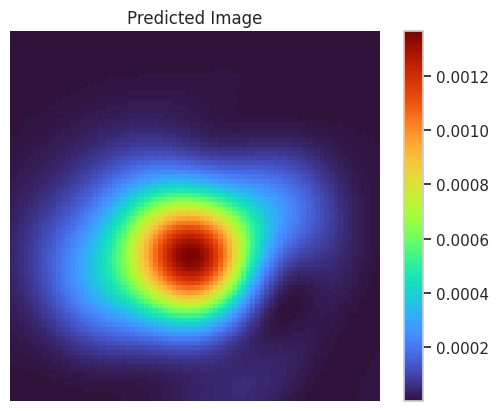

In [ ]:
image_to_plot = predicted_images[190]
plt.imshow(image_to_plot, cmap='turbo')  # Assuming the image is grayscale
plt.title('Predicted Image')
plt.colorbar()  # If you want to add a colorbar
plt.axis('off')  # Turn off axis labels
plt.show()

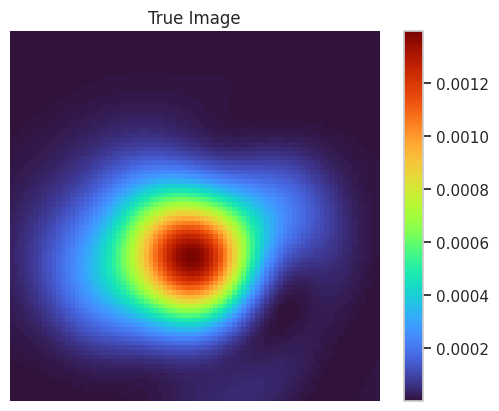

In [ ]:
image_to_plot = true_images[190]
plt.imshow(image_to_plot, cmap='turbo')  # Assuming the image is grayscale
plt.title('True Image')
plt.colorbar()  # If you want to add a colorbar
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
for i in range(100):
  plt.clf()
  plt.imshow(true_images[i], cmap='turbo')
  plt.title(f'True Image {i+1}')
  plt.colorbar()
  plt.axis('off')
  plt.savefig(f'True image {i+1}.png')
  plt.close()
  shutil.copy(f'True image {i+1}.png', "/content/drive/MyDrive/OpticsML/images/true")

print('Yay')


Yay


In [ ]:
for i in range(100):
  plt.clf()
  plt.imshow(predicted_images[i], cmap='turbo')
  plt.title(f'Predict Image {i+1}')
  plt.colorbar()
  plt.axis('off')
  plt.savefig(f'Predict image {i+1}.png')
  plt.close()
  shutil.copy(f'Predict image {i+1}.png', "/content/drive/MyDrive/OpticsML/images/predict")

print('Yay')

Yay


In [ ]:

# Step 3: Calculate image accuracies for each image
def calculate_image_accuracies(true_images, predicted_images, tolerance=0.00005):
    image_accuracies = []

    for i in range(len(true_images)):
        true_image = true_images[i]
        predicted_image = predicted_images[i]

        # Compare images element-wise with a tolerance
        diff = np.abs(true_image - predicted_image)
        accurate_pixels = np.sum(diff < tolerance)

        # Calculate accuracy for this image
        accuracy = accurate_pixels / true_image.numpy().size  # Use .numpy().size here
        image_accuracies.append(accuracy)

    return image_accuracies

image_accuracies = calculate_image_accuracies(true_images, predicted_images)


In [ ]:
print(image_accuracies)

[1.0, 0.8271875, 0.9540625, 0.9321875, 0.9515625, 0.9953125, 0.978125, 1.0, 0.9896875, 0.92484375, 0.99125, 0.976875, 1.0, 1.0, 0.9571875, 0.95796875, 0.886875, 1.0, 1.0, 0.95953125, 0.97921875, 0.838125, 0.8359375, 0.88375, 0.99328125, 1.0, 0.8809375, 0.98625, 0.93921875, 0.9784375, 1.0, 0.91625, 0.933125, 1.0, 1.0, 1.0, 0.96140625, 1.0, 0.88453125, 0.98625, 0.9378125, 0.9984375, 0.8803125, 0.99484375, 0.96234375, 1.0, 0.9478125, 1.0, 0.95125, 1.0, 0.89765625, 0.97828125, 0.973125, 1.0, 0.85515625, 1.0, 0.96703125, 0.93, 0.95921875, 0.99078125, 1.0, 0.95046875, 0.95765625, 0.99578125, 0.9778125, 0.988125, 0.99125, 1.0, 0.76625, 0.93390625, 0.94859375, 0.989375, 0.984375, 0.83890625, 0.88078125, 0.99703125, 1.0, 0.98484375, 0.99046875, 0.92328125, 1.0, 0.83140625, 0.9171875, 0.94953125, 0.9503125, 0.87671875, 0.97015625, 0.98671875, 0.98734375, 1.0, 0.9715625, 0.9784375, 1.0, 0.93546875, 1.0, 1.0, 0.9984375, 0.86796875, 0.72, 0.99421875, 1.0, 0.99984375, 1.0, 0.9459375, 0.96296875, 0.9